In [130]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
import numpy as np

In [132]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [134]:
X,Y=mnist.data,mnist.target

In [136]:
X.shape

(70000, 784)

In [138]:
Y.shape


(70000,)

In [140]:
28*28

784

In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [144]:
some_digit=X[0]

In [146]:
some_digit_image=some_digit.reshape(28, 28)

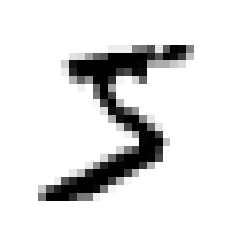

In [148]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [150]:
Y[0]

5

In [152]:
Y=Y.astype(np.uint8)

In [154]:
X_train, X_test, Y_train, Y_test=X[:60000], X[60000:],Y[:60000],Y[60000:]

In [156]:
Y_train_5=Y_train==5
Y_test_5=Y_test==5

In [158]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)

In [160]:
sgd_clf.fit(X_train, Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
sgd_clf.predict([some_digit])

array([ True])

In [164]:
from sklearn.model_selection import cross_val_predict
Y_train_pred=cross_val_predict(sgd_clf, X_train,Y_train_5,cv=3)

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_5, Y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [168]:
from sklearn.metrics import precision_score, recall_score

In [170]:
precision_score(Y_train_5, Y_train_pred)

0.8370879772350012

In [172]:
recall_score(Y_train_5, Y_train_pred)

0.6511713705958311

In [174]:
from sklearn.metrics import f1_score
f1_score(Y_train_5, Y_train_pred)

0.7325171197343846

In [176]:
Y_score=sgd_clf.decision_function([some_digit])

In [178]:
Y_score

array([2164.22030239])

In [180]:
threshold=0

In [182]:
Y_some_digit_pred=Y_score>threshold

In [184]:
Y_some_digit_pred

array([False])

In [186]:
threshold=8000
Y_some_digit_pred=Y_score>threshold
Y_some_digit_pred

array([False, False, False, ...,  True, False, False])

In [188]:
Y_score=cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3, method="decision_function")

In [190]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds= precision_recall_curve(Y_train_5, Y_score)

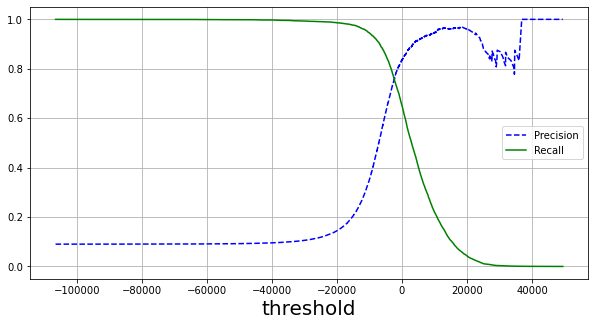

In [192]:
plt.figure(figsize=(10,5))
def plott(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall")
plott(precisions, recalls, thresholds)
plt.xlabel('threshold',fontsize=20)
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.show()


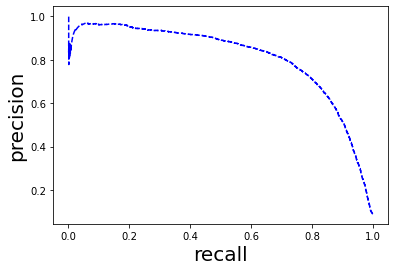

In [194]:
plt.xlabel('recall', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.plot(recalls,precisions,'b--')


In [196]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]

In [198]:
threshold_90_precision

3370.0194991439557

In [200]:
Y_train_pred_90=Y_score>=threshold_90_precision

In [202]:
precision_score(Y_train_5,Y_train_pred_90)

0.9000345901072293

In [204]:
recall_score(Y_train_5, Y_train_pred_90)

0.4799852425751706

In [206]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(Y_train_5, Y_score)

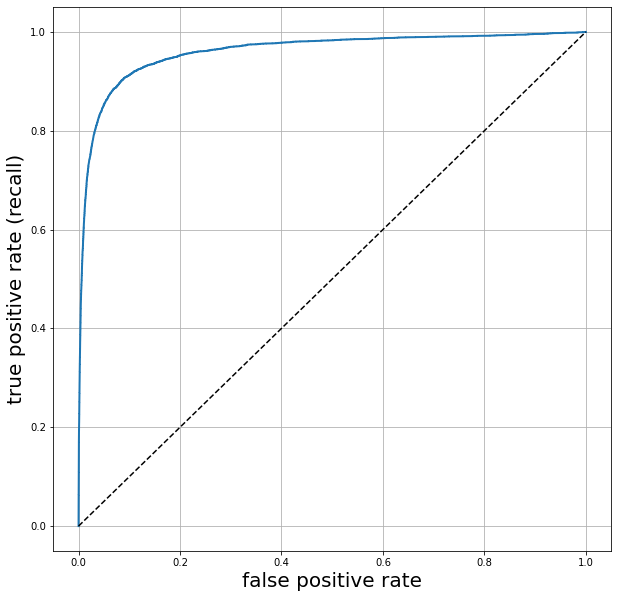

In [208]:
def rocplot(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plt.figure(figsize=(10,10))
plt.xlabel("false positive rate", fontsize=20)
plt.ylabel("true positive rate (recall)", fontsize=20)
plt.grid()
rocplot(fpr,tpr)


In [210]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5, Y_score)

0.9604938554008616

In [212]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [214]:
y_probas_forest=cross_val_predict(forest_clf, X_train, Y_train_5, cv=3, method='predict_proba')

In [216]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_5,y_scores_forest) 

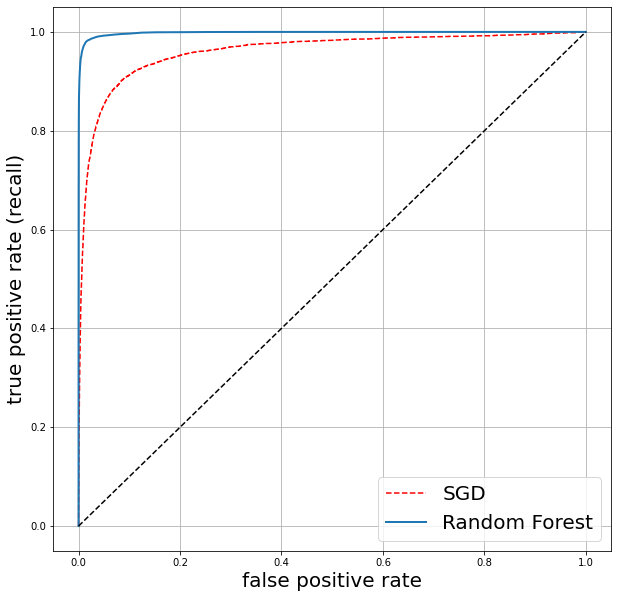

In [218]:
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr,"r--",label="SGD")
rocplot(fpr_forest, tpr_forest, "Random Forest")

plt.xlabel("false positive rate", fontsize=20)
plt.ylabel("true positive rate (recall)", fontsize=20)
plt.grid()
plt.legend(loc="lower right",fontsize=20) 
plt.show()


In [220]:
roc_auc_score(Y_train_5, y_scores_forest)

0.9983436731328145

In [222]:
from sklearn.svm import SVC
svm_clf=SVC()

In [ ]:
svm_clf.fit(X_train, Y_train) #does by OvO one vs one so if N classes 0-9 it will be N(N-1)/2 =45

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores=svm_clf.decision_function([some_digit])


In [ ]:
np.argmax(some_digit_scores)

In [ ]:
svm_clf.classes_

In [ ]:
sgd_clf.fit(X_train, Y_train) #can run directly for multiclass variable

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, Y_train, cv=3, scoring="accuracy")

In [ ]:
Y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, Y_train, cv=3)
con_max=confusion_matrix(Y_train, Y_train_pred)

In [ ]:
con_max